In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# read in custom nan values
missing_values= ['N/a','na','nan''NAN','NaN',np.nan]
# make train to df
train = pd.read_csv('train.csv',na_values = missing_values , dtype = {'Id' : np.str})
test = pd.read_csv('test.csv',na_values = missing_values , dtype = {'Id' : np.str})

# Clean out null/NaN values

In [2]:
train.head()
x = train.copy()
y = x.pop('SalePrice')

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   object 
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
drop_cols = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
x.drop(columns=drop_cols,inplace=True)

In [4]:
col_with_errors= ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType',
                 'GarageYrBlt','GarageFinish','GarageQual','GarageCond']
for i in col_with_errors:
    x[i].fillna(0,inplace=True)
x.replace({'Electrical': {np.nan: 'SBrkr'}},inplace=True)
x.replace({'GarageYrBlt': {np.nan: train.GarageYrBlt.mean()}},inplace=True)
x.GarageType.fillna(method='bfill', axis=0, inplace=True)
missing_values_count = x.isnull().sum()
missing_values_count[50:70]

x.loc[:,['MSZoning','Street','LotShape','LandContour']]

,MSZoning,Street,LotShape,LandContour
0,RL,Pave,Reg,Lvl
1,RL,Pave,Reg,Lvl
2,RL,Pave,IR1,Lvl
3,RL,Pave,IR1,Lvl
4,RL,Pave,IR1,Lvl
...,...,...,...,...
1455,RL,Pave,Reg,Lvl
1456,RL,Pave,Reg,Lvl
1457,RL,Pave,Reg,Lvl
1458,RL,Pave,Reg,Lvl


In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   object 
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
# Label encoding for categoricals
#for colname in x.select_dtypes("object"):
#    x[colname], _ = x[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
#discrete_features = x.dtypes == int


In [7]:
for i in x.columns:
    if x[i].isnull().values.any() == True:
        print(i)


LotFrontage
MasVnrType
MasVnrArea


In [8]:
x.LotFrontage.head(20)
x.LotFrontage.fillna(0,inplace=True)
x.MasVnrArea.fillna('None',inplace=True)
x.MasVnrType.fillna('None',inplace=True)

print(x.LotFrontage.isnull().values.any())
print(x.MasVnrArea.isnull().values.any())
print(x.MasVnrType.isnull().values.any())


False
False
False


# EDA On features by modifying them to get mutual info scores

In [9]:
# Label encoding for categoricals
for colname in x.select_dtypes("object"):
    x[colname], _ = x[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = x.dtypes == int


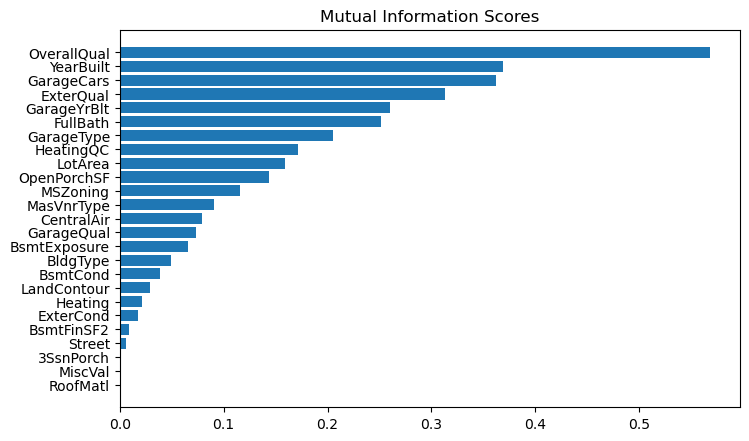

In [11]:

from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y, discrete_features)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores[::3])


In [24]:
mi_scores.head(40)

OverallQual      0.568269
Neighborhood     0.499702
GrLivArea        0.478662
YearBuilt        0.368932
TotalBsmtSF      0.367652
GarageArea       0.363053
GarageCars       0.362161
KitchenQual      0.327079
BsmtQual         0.324082
ExterQual        0.312888
1stFlrSF         0.307884
MSSubClass       0.272903
GarageYrBlt      0.260255
GarageFinish     0.257628
YearRemodAdd     0.256405
FullBath         0.251367
LotFrontage      0.215645
TotRmsAbvGrd     0.214843
GarageType       0.205434
2ndFlrSF         0.195626
Foundation       0.189774
HeatingQC        0.172002
Fireplaces       0.164948
Exterior2nd      0.160129
LotArea          0.159031
BsmtFinSF1       0.148664
BsmtFinType1     0.145489
OpenPorchSF      0.143705
Exterior1st      0.130892
BsmtUnfSF        0.118824
MSZoning         0.115885
OverallCond      0.108549
WoodDeckSF       0.103780
MasVnrType       0.090615
HalfBath         0.085255
HouseStyle       0.079380
CentralAir       0.078897
LotShape         0.075424
SaleConditio

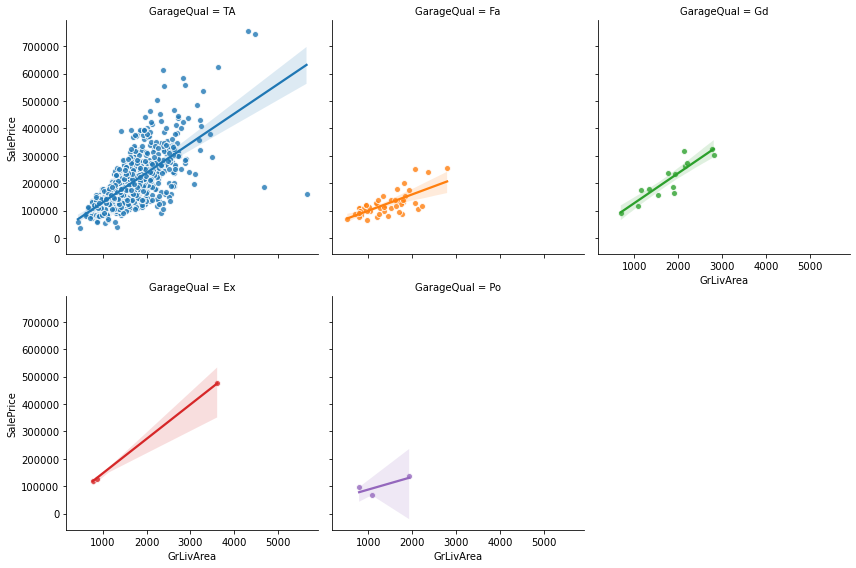

In [14]:
#Exploring low end relations
feature = 'GrLivArea'
sns.lmplot(x=feature,y='SalePrice',hue='GarageQual', col='GarageQual', 
           data=train,scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4)

# Develop+test Baseline Model  before making any more changes
## Just picking any regression model to test if data changes will improve performance

In [31]:
base_line_x = x.copy()
base_line_y = y.copy()

# Train and score baseline model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
baseline = LinearRegression()

baseline_score = cross_val_score(
    baseline, base_line_x, base_line_y, cv=5, scoring='r2'
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")


MAE Baseline Score: -0.7964


## Testing difference removing cols lower than 0.1 IM score

In [27]:
df_new = x[ ['OverallQual' ,
            'Neighborhood',
            'GrLivArea'   ,
            'YearBuilt'   ,
            'TotalBsmtSF' ,
            'GarageArea'  ,
            'GarageCars'  ,
            'KitchenQual' ,
            'BsmtQual'    ,
            'ExterQual'   ,
            '1stFlrSF'    ,
            'MSSubClass'  ,
            'GarageYrBlt' ,
            'GarageFinish',
            'YearRemodAdd',
            'FullBath'    ,
            'LotFrontage' ,
            'TotRmsAbvGrd',
            'GarageType'  ,
            '2ndFlrSF'    ,
            'Foundation'  ,
            'HeatingQC'   ,
            'Fireplaces'  ,
            'Exterior2nd' ,
            'LotArea'     ,
            'BsmtFinSF1'  ,
            'BsmtFinType1',
            'OpenPorchSF' ,
            'Exterior1st' ,
            'BsmtUnfSF'   ,
            'MSZoning'    ,
            'OverallCond' ,
            'WoodDeckSF']].copy()
df_new.head()

,OverallQual,Neighborhood,GrLivArea,YearBuilt,TotalBsmtSF,GarageArea,GarageCars,KitchenQual,BsmtQual,ExterQual,...,Exterior2nd,LotArea,BsmtFinSF1,BsmtFinType1,OpenPorchSF,Exterior1st,BsmtUnfSF,MSZoning,OverallCond,WoodDeckSF
0,7,0,1710,2003,856,548,2,0,0,0,...,0,8450,706,0,61,0,150,0,5,0
1,6,1,1262,1976,1262,460,2,1,0,1,...,1,9600,978,1,0,1,284,0,8,298
2,7,0,1786,2001,920,608,2,0,0,0,...,0,11250,486,0,42,0,434,0,5,0
3,7,2,1717,1915,756,642,3,0,1,1,...,2,9550,216,1,35,2,540,0,5,0
4,8,3,2198,2000,1145,836,3,0,0,0,...,0,14260,655,0,84,0,490,0,5,192


In [32]:
baseline_score = cross_val_score(
    baseline, df_new, base_line_y, cv=5, scoring='r2'


)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: -0.7982
